In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [3]:
heart_df=pd.read_csv('heart_disease_data.csv')
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
1,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
2,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
4,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
188,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
189,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
190,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
1,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1
2,58,1,0,146,218,0,1,105,0,2.0,1,1,3,0
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2,1
4,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
188,50,1,0,150,243,0,0,128,0,2.6,1,0,3,0
189,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
190,51,1,3,125,213,0,0,125,1,1.4,2,1,2,1


In [5]:
heart_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
count=0
for i in heart_df.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is only',round((count/len(heart_df.index))*100), 'percent of the entire dataset the rows with missing values are excluded.')

Total number of rows with missing values is  0
since it is only 0 percent of the entire dataset the rows with missing values are excluded.


In [8]:
heart_df.dropna(axis=0,inplace=True)

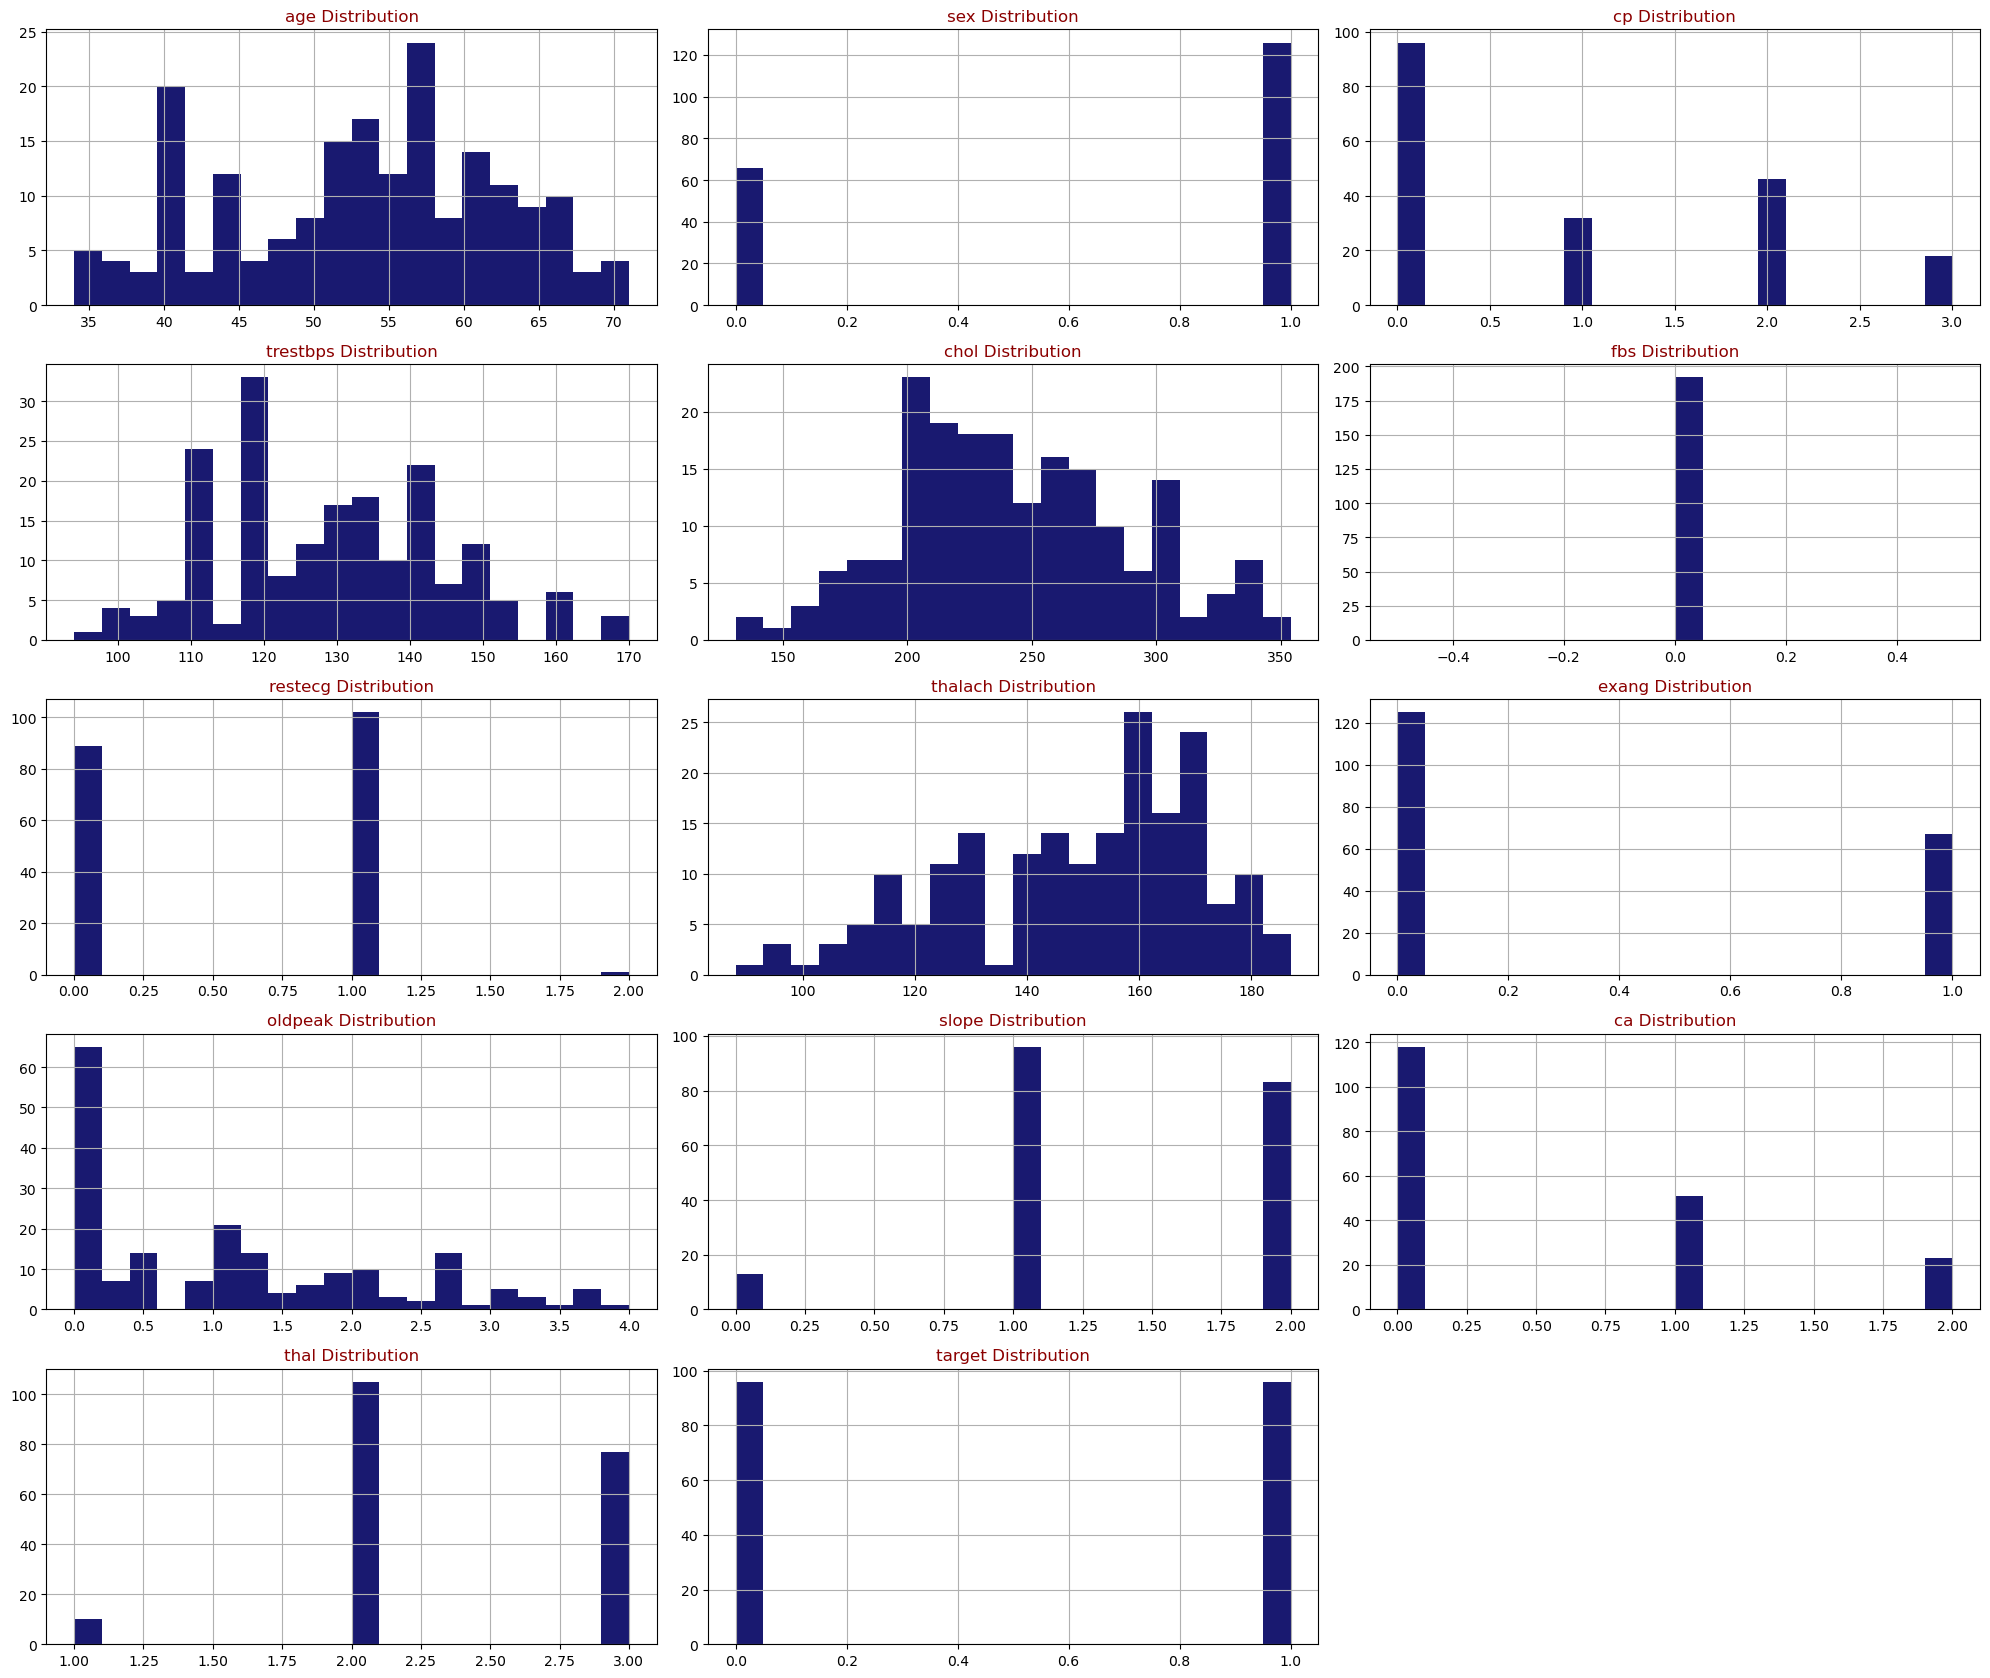

In [9]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

In [11]:
heart_df.target.value_counts()

0    96
1    96
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

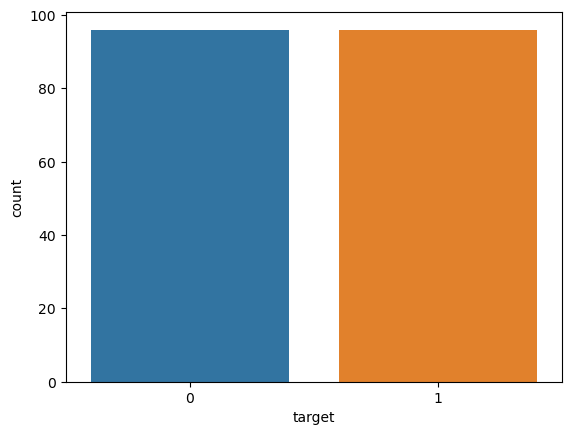

In [13]:
sn.countplot(x='target',data=heart_df)

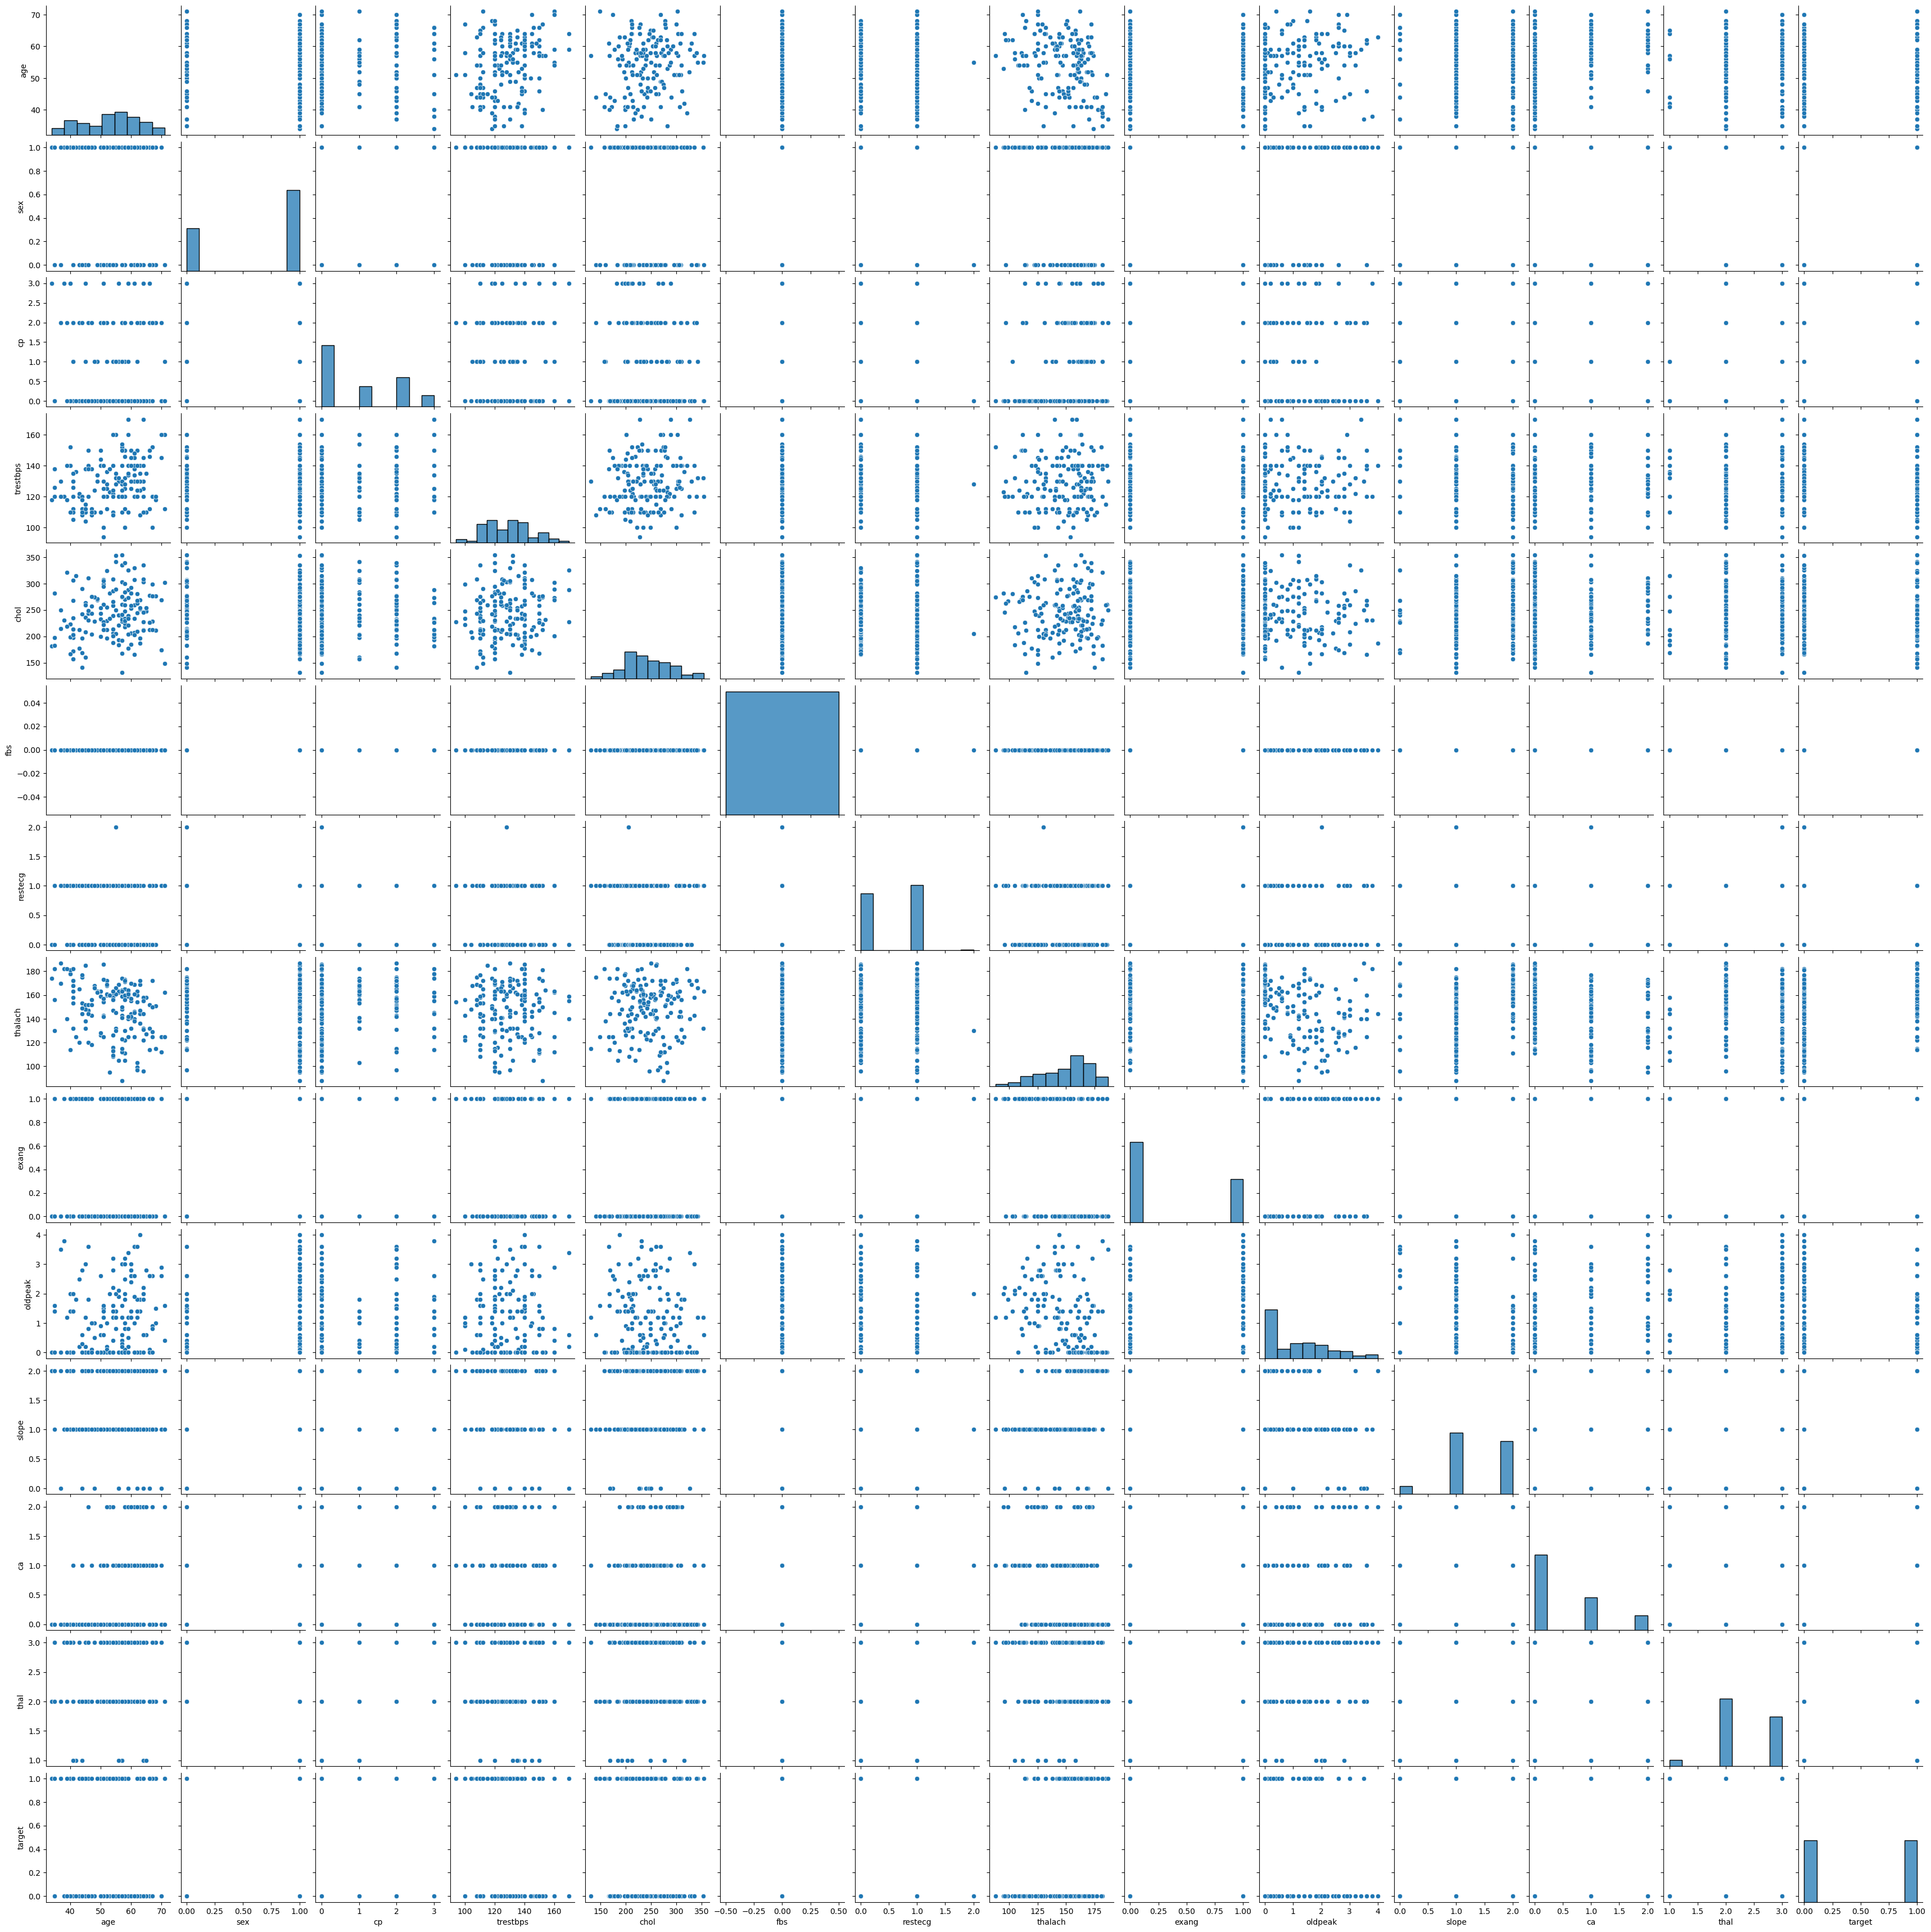

In [14]:
sn.pairplot(data=heart_df)

In [15]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.0,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,53.348958,0.656250,0.927083,129.208333,242.682292,0.0,0.541667,149.036458,0.348958,1.111979,1.364583,0.505208,2.348958,0.500000
std,8.996107,0.476201,1.055971,15.303503,46.546021,0.0,0.509936,22.249742,0.477887,1.096215,0.607454,0.701512,0.577138,0.501307
min,34.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,208.750000,0.0,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,0.500000,130.000000,237.500000,0.0,1.000000,155.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.500000
75%,60.000000,1.000000,2.000000,140.000000,273.250000,0.0,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,71.000000,1.000000,3.000000,170.000000,354.000000,0.0,2.000000,187.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [17]:
disease = len(heart_df[heart_df['target'] == "presence"])
no_disease = len(heart_df[heart_df['target']== "absence"])


In [18]:
qualitative = []
quantitative = []
for feature in heart_df.columns:
    if len(heart_df[feature].unique()) <= 8:
        qualitative.append(feature)
    else:
        quantitative.append(feature)

In [19]:
qualitative

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [20]:
quantitative

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

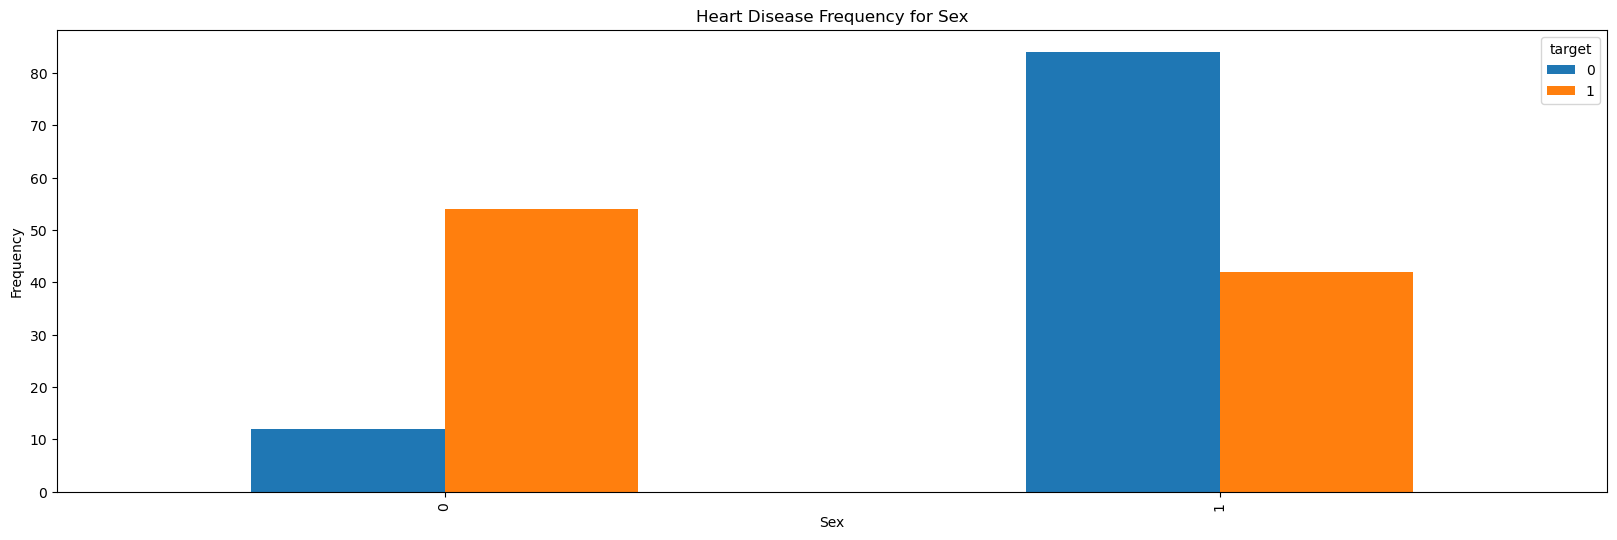

In [23]:
#this is the codebase for generating graph, you don't need to understand it right now. assume it as a block
pd.crosstab(heart_df.sex,heart_df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex')
plt.ylabel('Frequency')
plt.show()


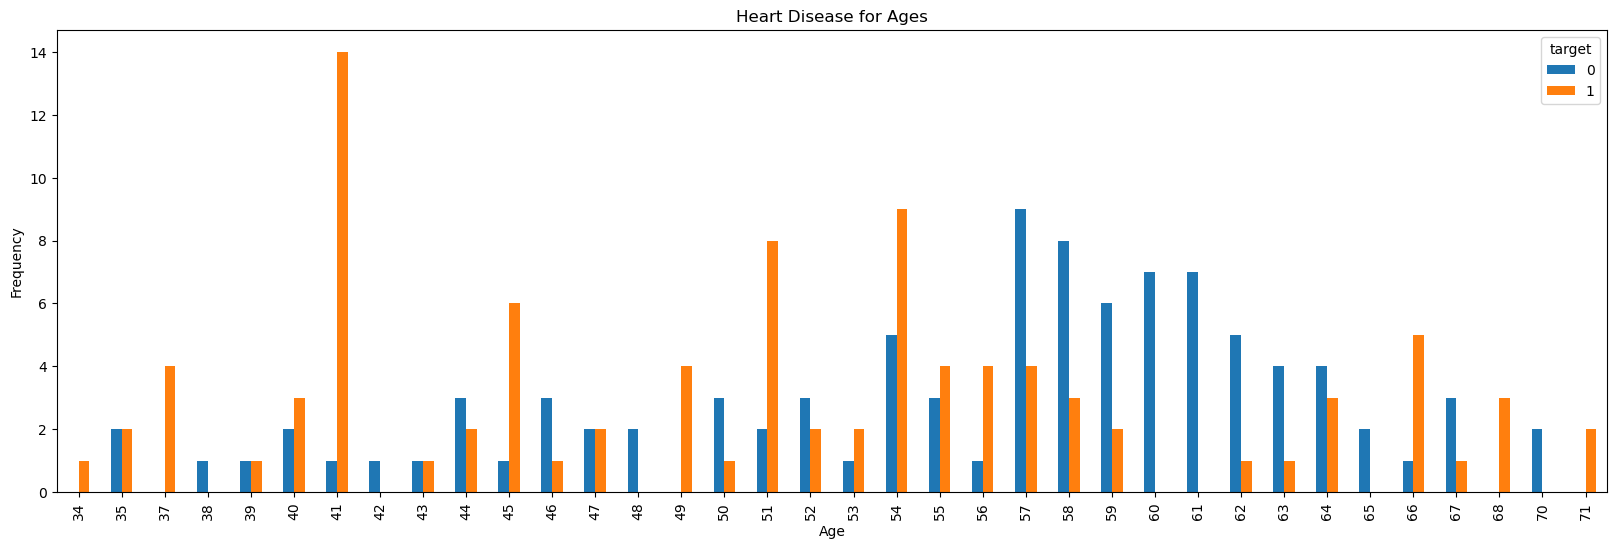

In [24]:
pd.crosstab(heart_df.age,heart_df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [25]:
#scikit learn is a ready to go machine learning library 
from sklearn import ensemble
clf_rand = ensemble.RandomForestClassifier()

In [26]:
from sklearn import linear_model
clf_log = linear_model.LogisticRegression()

In [27]:
#we need to shuffle the data then we need split the dataset as training data and testing data
from sklearn.model_selection import train_test_split

In [28]:
#Our features = age - thal
features = heart_df.iloc[:, 0:13]
label = heart_df['target']

In [29]:
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,59,1,3,170,288,0,0,159,0,0.2,1,0,3
1,56,1,3,120,193,0,0,162,0,1.9,1,0,3
2,58,1,0,146,218,0,1,105,0,2.0,1,1,3
3,45,1,0,104,208,0,0,148,1,3.0,1,0,2
4,52,1,1,120,325,0,1,172,0,0.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,44,0,2,118,242,0,1,149,0,0.3,1,1,2
188,50,1,0,150,243,0,0,128,0,2.6,1,0,3
189,57,0,0,140,241,0,1,123,1,0.2,1,0,3
190,51,1,3,125,213,0,0,125,1,1.4,2,1,2


In [30]:
#random state is a calculated randomness
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.1, random_state=2)
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
53,58,1,0,125,300,0,0,171,0,0.0,2,2,3
125,58,1,0,128,259,0,0,130,1,3.0,1,2,3
45,51,0,2,140,308,0,0,142,0,1.5,2,1,2
118,57,1,1,124,261,0,1,141,0,0.3,2,0,3
170,39,1,0,118,219,0,1,140,0,1.2,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,54,1,0,140,239,0,1,160,0,1.2,2,0,2
22,41,1,2,130,214,0,0,168,0,2.0,1,0,2
72,40,1,3,140,199,0,1,178,1,1.4,2,0,3
15,58,1,0,150,270,0,0,111,1,0.8,2,0,3


In [31]:
#fitting the training dataset to the classifier 
clf_rand.fit(X_train, y_train)
clf_log.fit(X_train, y_train)

C:\Users\saipr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
#predicting the test dataset through classifier
pred_rand = clf_rand.predict(X_test)
pred_log = clf_log.predict(X_test)

In [33]:
print(pred_rand)
print(pred_log)

[1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1]
[1 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 1 1]


In [34]:
#confusion matrix for random forest
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_rand)
print(cm)

[[ 8  1]
 [ 0 11]]


In [35]:
#confusion matrix for logistic regression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred_log)
print(cm)

[[ 8  1]
 [ 1 10]]


In [36]:
#how accurately our classifier predicts those test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_rand)

0.95

In [37]:
#how accurately our classifier predicts those test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_log)

0.9

In [38]:
#predicting with the new value
clf_rand.predict([[39, 0, 1, 135, 208, 0, 0, 171, 0, 1.5, 2, 0, 2]])

C:\Users\saipr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression
Training Score: 0.872093023255814
Testing Score: 0.95
   Predicted
0          1
1          1
2          0
3          0
4          0
% of people predicted with heart-disease: 0.5
              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



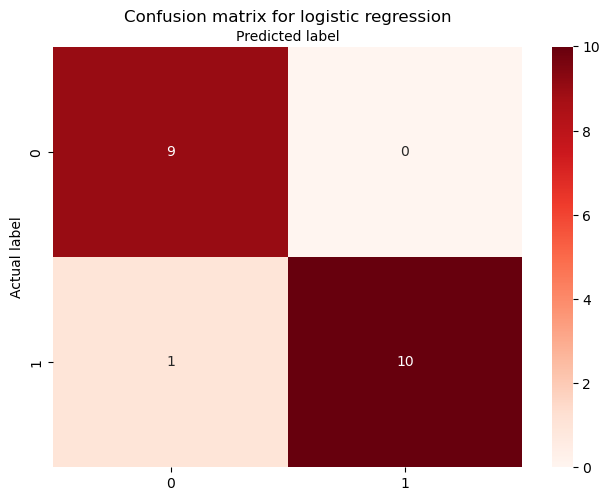

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sn.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Reds', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

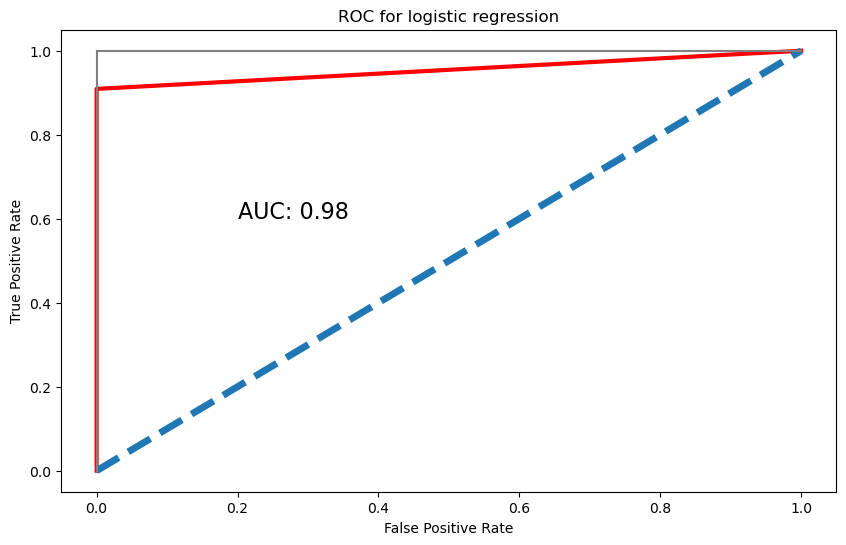

In [45]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
y_probabilities = model.predict_proba(X_test)[:,1]
false_positive_rate_knn, true_positive_rate_knn, threshold_knn = roc_curve(y_test,Y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for logistic regression')
plt.plot(false_positive_rate_knn, true_positive_rate_knn, linewidth=3, color='Red')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_probabilities)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()